<a href="https://colab.research.google.com/github/vyassuyog1/BERT/blob/master/JantaCS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#Importing Data

In [ ]:
data_orignal=pd.read_csv("/content/Train_aBjfeNk.csv")
data=data_orignal.copy()
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
data.drop('ID',axis=1,inplace=True)

#Diagrams

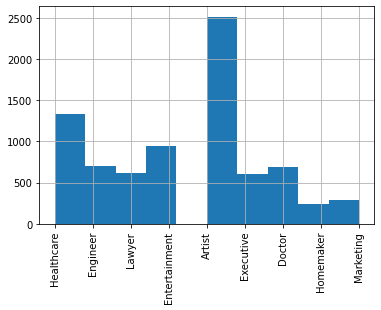

In [ ]:
data.Profession.hist()
plt.xticks(rotation=90)
plt.show()

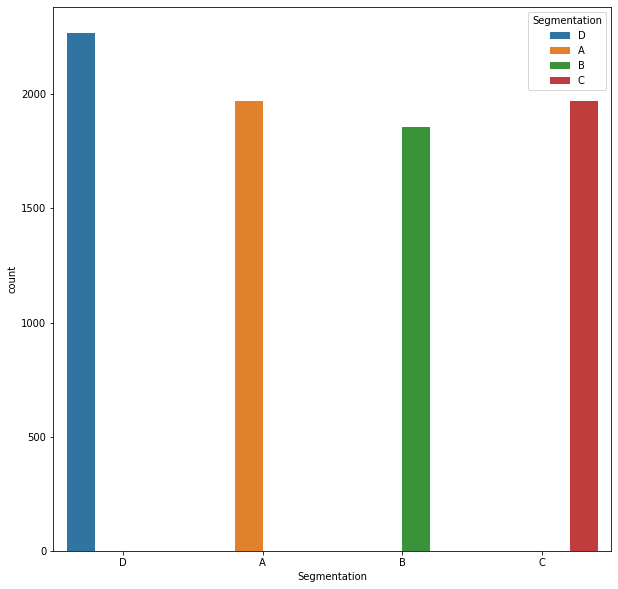

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=data.Segmentation,hue=data.Segmentation)

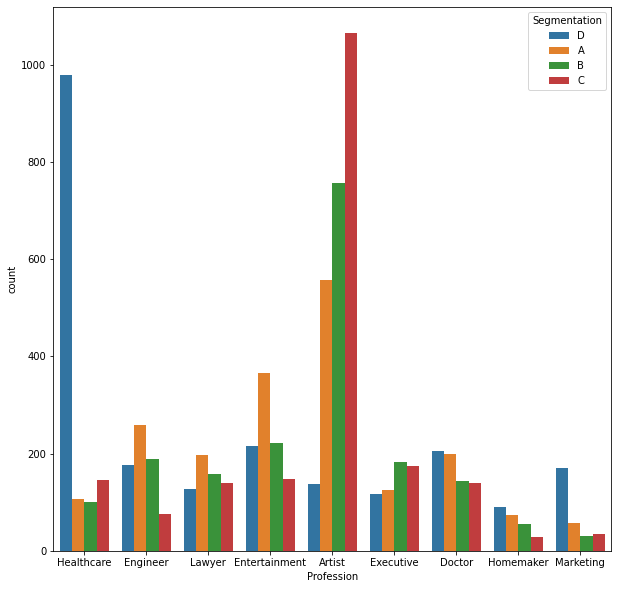

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=data.Profession,hue=data.Segmentation)

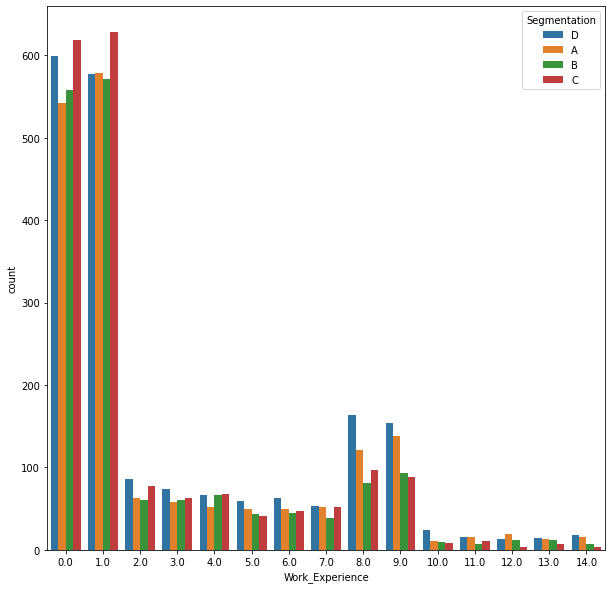

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=data.Work_Experience,hue=data.Segmentation)

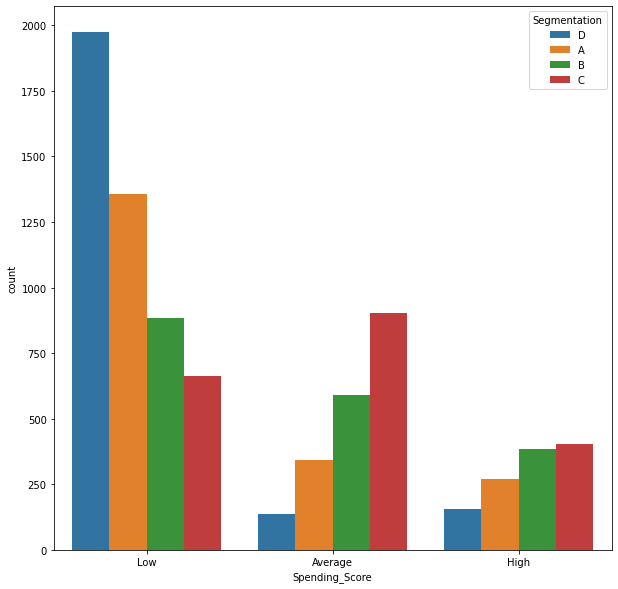

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=data.Spending_Score,hue=data.Segmentation)

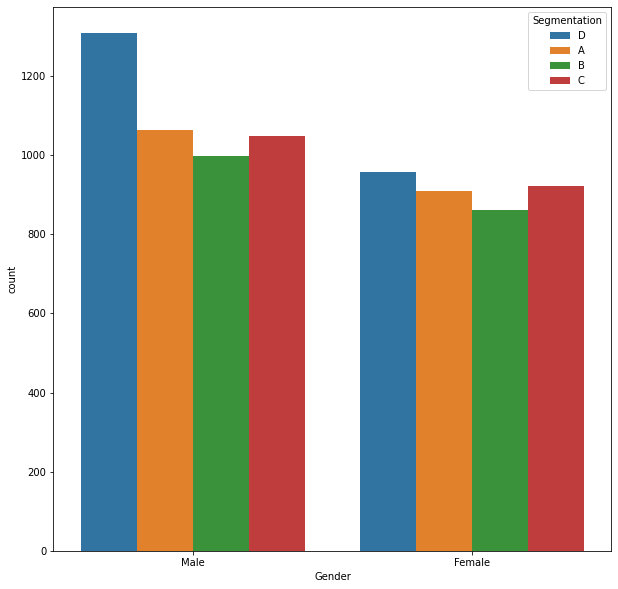

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=data.Gender,hue=data.Segmentation)

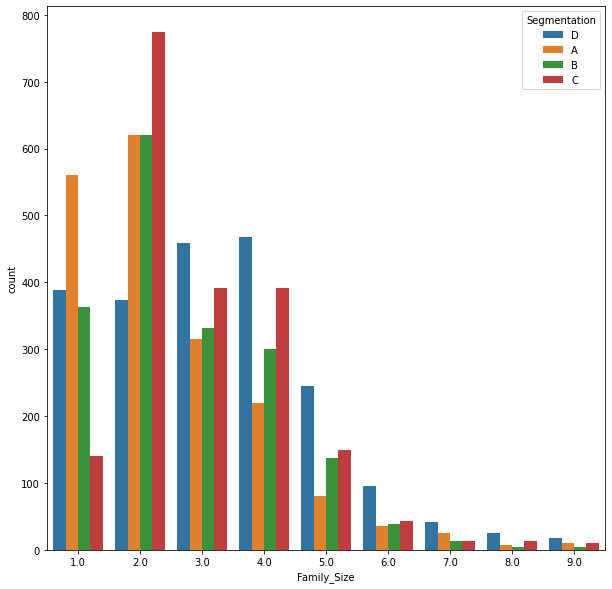

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=data.Family_Size,hue=data.Segmentation)

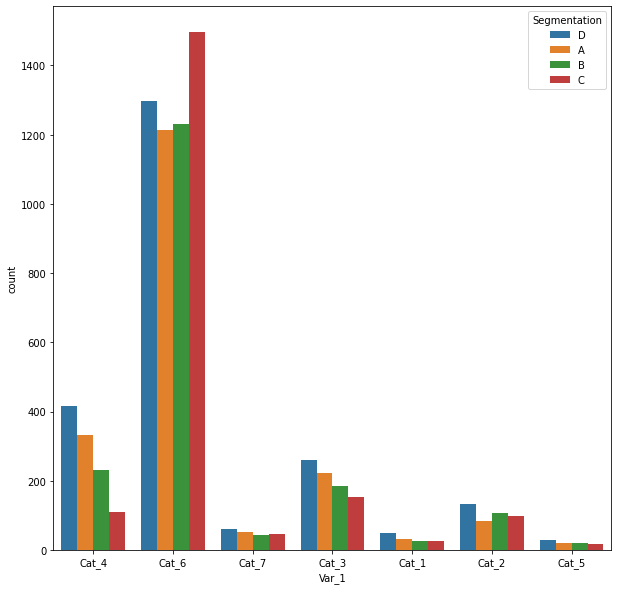

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=data.Var_1,hue=data.Segmentation)

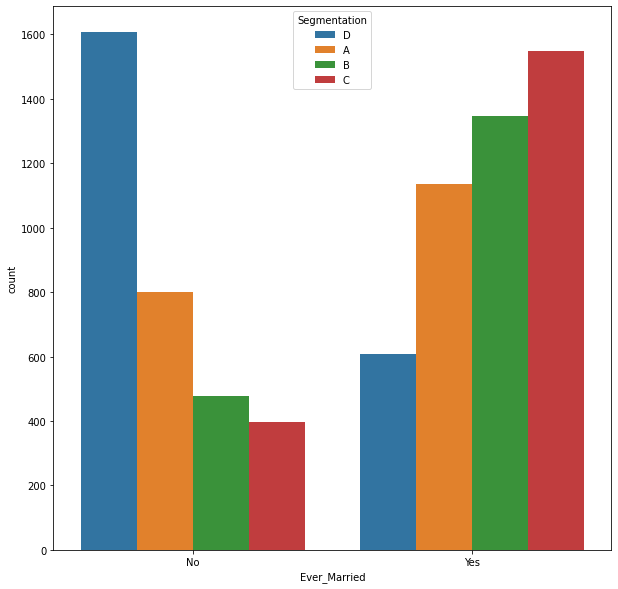

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(x=data.Ever_Married,hue=data.Segmentation)

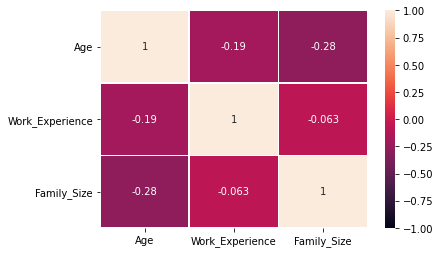

In [ ]:
sns.heatmap(data=data.corr(),vmin=-1,vmax=1,linewidths=0.5,annot=data.corr())
plt.show()

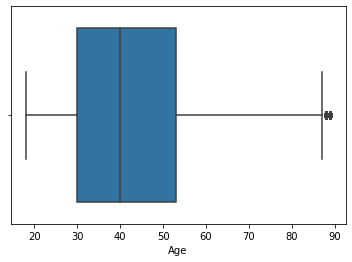

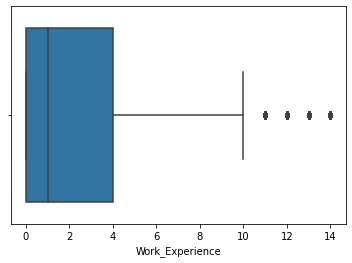

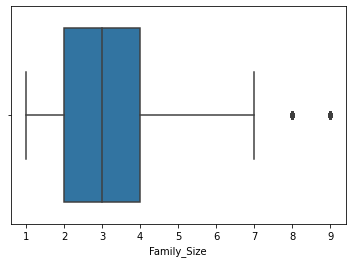

In [ ]:
for i in data.select_dtypes(include=np.number):
  sns.boxplot(data=data,x=i)
  plt.show()

#managing outliers making them in limit (not > 95%)


In [ ]:

for i in data.select_dtypes(include=np.number):
  upper=data.loc[:][i].max() * 0.95
  z=0
  for k in data.loc[:][i]:
    if k > upper:
      data[i][z]=upper
      z+=1
    else:
      z+=1

data      
      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


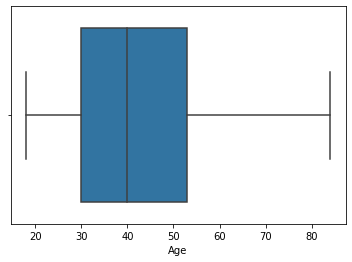

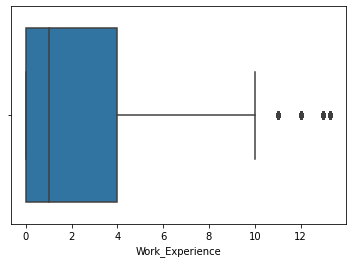

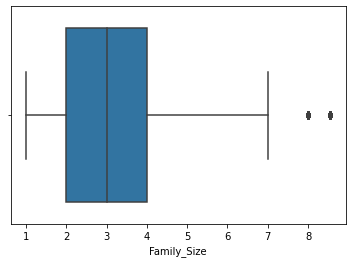

In [ ]:
for i in data.select_dtypes(include=np.number):
  sns.boxplot(data=data,x=i)
  plt.show()

#Filling Nan

In [ ]:
data.fillna(data.mean(),inplace=True)
data.fillna(data.mode().iloc[0],inplace=True)
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.000000,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.000000,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.000000,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.000000,Low,4.0,Cat_6,B


In [ ]:
data.isnull().any()

Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Var_1              False
Segmentation       False
dtype: bool

#Dealing with Categorical Variables

#One Hot Encoding

In [ ]:
data_onc=pd.get_dummies(data=data,columns=['Profession','Var_1'])
data_onc

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Segmentation,Y,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Var_1_Cat_1,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7
0,1,0,22,0,1.000000,1,4.0,D,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,0,1,38,1,2.637312,2,3.0,A,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.000000,1,1.0,B,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
3,1,1,67,1,0.000000,3,2.0,B,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,0,1,40,1,2.637312,3,6.0,A,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0.000000,1,7.0,D,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8064,1,0,35,0,3.000000,1,4.0,D,3,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
8065,0,0,33,1,1.000000,1,1.0,D,3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
8066,0,0,27,1,1.000000,1,4.0,B,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


#Organizing target "Y"

In [ ]:
Y=data.Segmentation
target_dict={v:k for v,k in enumerate(sorted(Y.unique()))}
target_dict
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,Female,Yes,38,Yes,Engineer,2.641663,Average,3.0,Cat_4,A
2,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,Female,Yes,40,Yes,Entertainment,2.641663,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...
8063,Male,No,22,No,Artist,0.000000,Low,7.0,Cat_1,D
8064,Male,No,35,No,Executive,3.000000,Low,4.0,Cat_4,D
8065,Female,No,33,Yes,Healthcare,1.000000,Low,1.0,Cat_6,D
8066,Female,No,27,Yes,Healthcare,1.000000,Low,4.0,Cat_6,B


In [ ]:
lb=LabelEncoder()
Y=lb.fit_transform(Y)
#Y=pd.get_dummies(Y)
data['Y']=Y
Y

array([3, 0, 1, ..., 3, 1, 1])

#LabelEncoding all columns / Some Columns

In [ ]:
for i in data.select_dtypes(exclude=np.number):
  data[i]=lb.fit_transform(data.loc[:][i])

data  

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Y
0,1,0,22,0,5,1.000000,2,4.0,3,3,3
1,0,1,38,1,2,2.641663,0,3.0,3,0,0
2,0,1,67,1,2,1.000000,2,1.0,5,1,1
3,1,1,67,1,7,0.000000,1,2.0,5,1,1
4,0,1,40,1,3,2.641663,1,6.0,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,1,0,22,0,0,0.000000,2,7.0,0,3,3
8064,1,0,35,0,4,3.000000,2,4.0,3,3,3
8065,0,0,33,1,5,1.000000,2,1.0,5,3,3
8066,0,0,27,1,5,1.000000,2,4.0,5,1,1


0       36
1       37
2       66
3       59
4       19
        ..
2622    29
2623    35
2624    53
2625    47
2626    43
Name: Age, Length: 2627, dtype: int64

In [ ]:
data.Gender[data.Gender=="Male"]=1
data.Gender[data.Gender=="Female"]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.Ever_Married[data.Ever_Married=="No"]=0
data.Ever_Married[data.Ever_Married=="Yes"]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.Graduated[data.Graduated=="Yes"]=1
data.Graduated[data.Graduated=="No"]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.Spending_Score[data.Spending_Score=='Low']=1
data.Spending_Score[data.Spending_Score=='Average']=2
data.Spending_Score[data.Spending_Score=='High']=3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

#Trying target Encoding on Datasets 

In [ ]:
data_final=data.copy()
X=data_final.copy()
X.drop(['Segmentation','Y'],axis=1,inplace=True)
#X=np.asarray(X)
#Y=np.asarray(Y)
print(type(X),type(Y),X.shape,Y.shape)

<class 'pandas.core.frame.DataFrame'> <class 'numpy.ndarray'> (8068, 9) (8068,)


In [ ]:
mean_encoding_prof = X.groupby(['Profession']).agg({'Y':['std']}).reset_index()
X=X.merge(mean_encoding_prof,on="Profession",how='left')

mean_encoding_var = X.groupby(['Var_1']).agg({'Y':['std']}).reset_index()
X=X.merge(mean_encoding_var,on="Var_1",how='left')



/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
X.drop(['Profession','Var_1',"Y_x"],axis=1,inplace=True)
print(X.shape)

(8068, 9)


#Splitting data

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
X_train,X_val,y_train,y_val=train_test_split(X,Y,random_state=42,test_size=0.25,stratify=Y)
print(X_train.shape,X_val.shape,y_train.shape,y_val.shape)


(6051, 9) (2017, 9) (6051,) (2017,)


#Standatdizind Data

In [ ]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_val_std=std.transform(X_val)

print(X_train_std.shape,X_val_std.shape)

(6051, 9) (2017, 9)


In [ ]:
from sklearn.preprocessing import MinMaxScaler

std=MinMaxScaler()
X_train_mn=std.fit_transform(X_train)
X_val_mn=std.transform(X_val)

print(X_train_mn.shape,X_val_mn.shape)

(6051, 9) (2017, 9)


In [ ]:
from sklearn.preprocessing import Normalizer


std=Normalizer()
X_train_mn=std.fit_transform(X_train)
X_val_mn=std.transform(X_val)

print(X_train_mn.shape,X_val_mn.shape)

(6051, 9) (2017, 9)


#Building Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,f1_score

In [ ]:
def acc(preds,true):
  correct,total=0,0
  pd,te=[],[]
  print(true)
  true=np.asarray(true)
  for p,t in zip(preds,true):
    
    p=np.argmax(p)
    t=np.argmax(t)
    pd.append(p)
    te.append(t) 
    if p==t:
      correct+=1
    total+=1
  f1=f1_score(te,pd,average="weighted")

  return correct/total  , f1

def acc_lb(preds,true):
  correct,total=0,0
  correct=np.sum(np.isclose(preds,true))
  f1_socre=f1_score(true,preds,average='weighted')
  return correct/len(true) , f1_socre

In [ ]:
def run_model(model,X_train,X_val,y_val):
  model=model
  model.fit(X_train,y_train)
  y_pred=model.predict(X_val)
  accu,f1=acc_lb(y_pred,y_val)
  results = mean_squared_error(y_val,y_pred)
  print(f"Model: {str(model)}, Accuracy: {accu} , F1_socre: {f1},  MSE: {results}")

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier


accuracy=run_model(LogisticRegression(max_iter=50),X_train,X_val,y_val)
print(accuracy)

accuracy=run_model(LinearDiscriminantAnalysis(),X_train,X_val,y_val)
print(accuracy)

accuracy=run_model(KNeighborsClassifier(10),X_train,X_val,y_val)
print(accuracy)

accuracy=run_model(DecisionTreeClassifier(),X_train,X_val,y_val)
print(accuracy)

accuracy=run_model(SVC(),X_train,X_val,y_val)
print(accuracy)

accuracy=run_model(GaussianNB(),X_train,X_val,y_val)
print(accuracy)

accuracy=run_model(XGBClassifier(),np.asarray(X_train),np.asarray(X_val),y_val)
print(accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), Accuracy: 0.4928111056023798 , F1_socre: 0.4516224187213908,  MSE: 1.7773921665840358
None
Model: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), Accuracy: 0.5037183936539414 , F1_socre: 0.47023169399823767,  MSE: 1.722855726326227
None
Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform'), Accuracy: 0.48339117501239465 , F1_socre: 0.48226568332231257,  MSE: 1.824987605354487
None
Model: DecisionTreeClassifier(ccp_alp

In [ ]:
X_train

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,"('Y', 'std')_x","(Y_y, std)"
5601,1,1,50,0,1.0,3,4.000000,1.027416,1.099166
484,0,0,21,0,1.0,1,4.000000,0.937971,1.118695
7545,1,1,50,1,0.0,1,3.000000,0.900636,1.099166
4996,0,1,52,1,7.0,3,4.000000,1.195516,1.099166
5242,0,1,42,0,0.0,2,2.000000,1.209477,1.099166
...,...,...,...,...,...,...,...,...,...
1930,0,0,19,0,0.0,1,2.847562,0.937971,1.099166
7551,1,0,56,0,1.0,1,2.000000,1.209477,1.099166
674,0,0,26,0,0.0,1,2.000000,1.195505,1.099166
59,1,1,72,1,1.0,1,2.847562,1.123725,1.273592


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from numpy import set_printoptions


test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train, y_train)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X_train)

[3.806e+00 4.042e+02 5.784e+03 2.709e+02 1.738e+03 2.242e+02 5.571e+02
 1.517e+02 3.750e+01]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_train_fs=X_train.iloc[:,1:8]
X_val_fs=X_val.iloc[:,1:8]


accuracy=run_model(LogisticRegression(max_iter=50),X_train_fs,X_val_fs,y_val)
print(accuracy)

accuracy=run_model(LinearDiscriminantAnalysis(),X_train_fs,X_val_fs,y_val)
print(accuracy)

accuracy=run_model(KNeighborsClassifier(1),X_train_fs,X_val_fs,y_val)
print(accuracy)

accuracy=run_model(DecisionTreeClassifier(),X_train_fs,X_val_fs,y_val)
print(accuracy)

accuracy=run_model(SVC(),X_train_fs,X_val_fs,y_val)
print(accuracy)

accuracy=run_model(GaussianNB(),X_train_fs,X_val_fs,y_val)
print(accuracy)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=50,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False), Accuracy: 0.4843827466534457 , F1_socre: 0.431953621987132,  MSE: 1.7912741695587506
None
Model: LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001), Accuracy: 0.49826474962816064 , F1_socre: 0.46291274903282437,  MSE: 1.697570649479425
None
Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'), Accuracy: 0.43083787803668816 , F1_socre: 0.42976823189332086,  MSE: 1.8750619732275657
None
Model: DecisionTreeClassifier(ccp_alp

(6051, 24)

#Test Dataset

In [ ]:
data_orignal_test=pd.read_csv("/content/Test_LqhgPWU.csv")
data=data_orignal_test.copy()
data

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [ ]:
data.drop('ID',axis=1,inplace=True)

In [ ]:
#managing outliers making them in limit (not > 75%)

for i in data.select_dtypes(include=np.number):
  upper=data.loc[:][i].max() * 0.95
  z=0
  for k in data.loc[:][i]:
    if k > upper:
      data[i][z]=upper
      z+=1
    else:
      z+=1

data      
      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [ ]:
data.fillna(data.mean(),inplace=True)
data.fillna(data.mode().iloc[0],inplace=True)
data

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,Female,Yes,36,Yes,Engineer,0.000000,Low,1.0,Cat_6
1,Male,Yes,37,Yes,Healthcare,8.000000,Average,4.0,Cat_6
2,Female,Yes,69,No,Artist,0.000000,Low,1.0,Cat_6
3,Male,Yes,59,No,Executive,11.000000,High,2.0,Cat_6
4,Female,No,19,No,Marketing,2.546353,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...
2622,Male,No,29,No,Healthcare,9.000000,Low,4.0,Cat_6
2623,Female,No,35,Yes,Doctor,1.000000,Low,1.0,Cat_6
2624,Female,No,53,Yes,Entertainment,2.546353,Low,2.0,Cat_6
2625,Male,Yes,47,Yes,Executive,1.000000,High,5.0,Cat_4


In [ ]:
data.isnull().any()

Gender             False
Ever_Married       False
Age                False
Graduated          False
Profession         False
Work_Experience    False
Spending_Score     False
Family_Size        False
Var_1              False
dtype: bool

In [ ]:
for i in data.select_dtypes(exclude=np.number):
  data[i]=lb.fit_transform(data.loc[:][i])

data  

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,1,36,1,2,0.000000,2,1.0,5
1,1,1,37,1,5,8.000000,0,4.0,5
2,0,1,69,0,0,0.000000,2,1.0,5
3,1,1,59,0,4,11.000000,1,2.0,5
4,0,0,19,0,8,2.546353,2,4.0,5
...,...,...,...,...,...,...,...,...,...
2622,1,0,29,0,5,9.000000,2,4.0,5
2623,0,0,35,1,1,1.000000,2,1.0,5
2624,0,0,53,1,3,2.546353,2,2.0,5
2625,1,1,47,1,4,1.000000,1,5.0,3


In [ ]:
data.Gender[data.Gender=="Male"]=1
data.Gender[data.Gender=="Female"]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.Ever_Married[data.Ever_Married=="No"]=0
data.Ever_Married[data.Ever_Married=="Yes"]=1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.Graduated[data.Graduated=="Yes"]=1
data.Graduated[data.Graduated=="No"]=0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
data.Spending_Score[data.Spending_Score=='Low']=1
data.Spending_Score[data.Spending_Score=='Average']=2
data.Spending_Score[data.Spending_Score=='High']=3

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid 

In [ ]:
data=data.merge(mean_encoding_prof,on="Profession",how='left')

data=data.merge(mean_encoding_var,on="Var_1",how='left')

/usr/local/lib/python3.6/dist-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3936: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
data.drop(['Profession','Var_1'],axis=1,inplace=True)
data

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,"('Y', 'std')_x","(Y_y, std)"
0,0,1,36,1,0.000000,1,1.0,1.195516,1.099166
1,1,1,37,1,8.000000,2,4.0,0.937971,1.099166
2,0,1,66,0,0.000000,1,1.0,0.900636,1.099166
3,1,1,59,0,10.500000,3,2.0,1.027416,1.099166
4,0,0,19,0,2.499152,1,4.0,1.209477,1.099166
...,...,...,...,...,...,...,...,...,...
2622,1,0,29,0,9.000000,1,4.0,0.937971,1.099166
2623,0,0,35,1,1.000000,1,1.0,1.195505,1.099166
2624,0,0,53,1,2.499152,1,2.0,1.182321,1.099166
2625,1,1,47,1,1.000000,3,5.0,1.027416,1.273592


In [ ]:
model=LinearDiscriminantAnalysis()
model.fit(X_train_std,y_train)
y_pred=model.predict(X_val_std)
acc_lb(y_pred,y_val)
  

(0.5037183936539414, 0.47023169399823767)

In [ ]:
data_std=std.fit_transform(data)
y_pred=model.predict(data)
y_pred

array([2, 2, 2, ..., 2, 2, 2])

In [ ]:
y=[]
for i in y_pred:
  #=np.argmax(i,axis=0)
  y.append(target_dict[i])
y[1]

'C'

In [ ]:
dicto={"ID":data_orignal_test.loc[:]['ID'],'Segmentation':y}

In [ ]:
submission=pd.DataFrame(dicto)
submission

,ID,Segmentation
0,458989,C
1,458994,C
2,458996,C
3,459000,C
4,459001,C
...,...,...
2622,467954,C
2623,467958,C
2624,467960,C
2625,467961,C


In [ ]:
submission.Segmentation.value_counts()

C    2627
Name: Segmentation, dtype: int64

In [ ]:
submission.set_index("ID")
submission

,ID,Segmentation
0,458989,C
1,458994,C
2,458996,C
3,459000,C
4,459001,B
...,...,...
2622,467954,C
2623,467958,C
2624,467960,C
2625,467961,C


In [ ]:
submission.to_csv("CustomerSegmentationSubmission.csv")

In [ ]:
y_pred

array([3, 0, 1, ..., 0, 1, 2])